#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import model_utils
import warnings
from importlib import reload

In [2]:
plt.style.use('./styles.txt')
warnings.filterwarnings('ignore')

#### Index

---
<a id='intro'></a>
# Introduction

So far our classification problem has been directed by the wildfire classifications given by the original data set. Our models have been significantly underperforming when trying to classify such a number of classes, with the additional difficulty of the wildfire sizes themselves varying massively. It could perhaps be more useful to simplify the classification problem by creating alternate bins which separate the fires into more distinguishable, from the perspective of the model, categories. 

---

## Analysing Wildfire Class Distribution

In the classification models that we have created so far wildfires have been separated into the following categories:

<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Fire Size Class</th>
    <th style="text-align: left; background: lightgrey">Size</th>
  </tr>
  <tr>
    <td style="text-align: left"> <code>A</code> </td>
    <td style="text-align: left">0-0.25 acres</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>B</code></td>
    <td style="text-align: left">0.26-9.99 acres</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>C</code></td>
    <td style="text-align: left">10.0-99.9 acres</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>D</code></td>
    <td style="text-align: left">100-299 acres</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>E</code></td>
    <td style="text-align: left">300-999 acres</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>F</code></td>
    <td style="text-align: left">1000-4999</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>G</code></td>
    <td style="text-align: left">5000+ acres</td>
  </tr>
</table>

Let us look at the distribution of our fires and see whether we can determine a better way to split the fires.

In [3]:
df = utils.LoadDf()

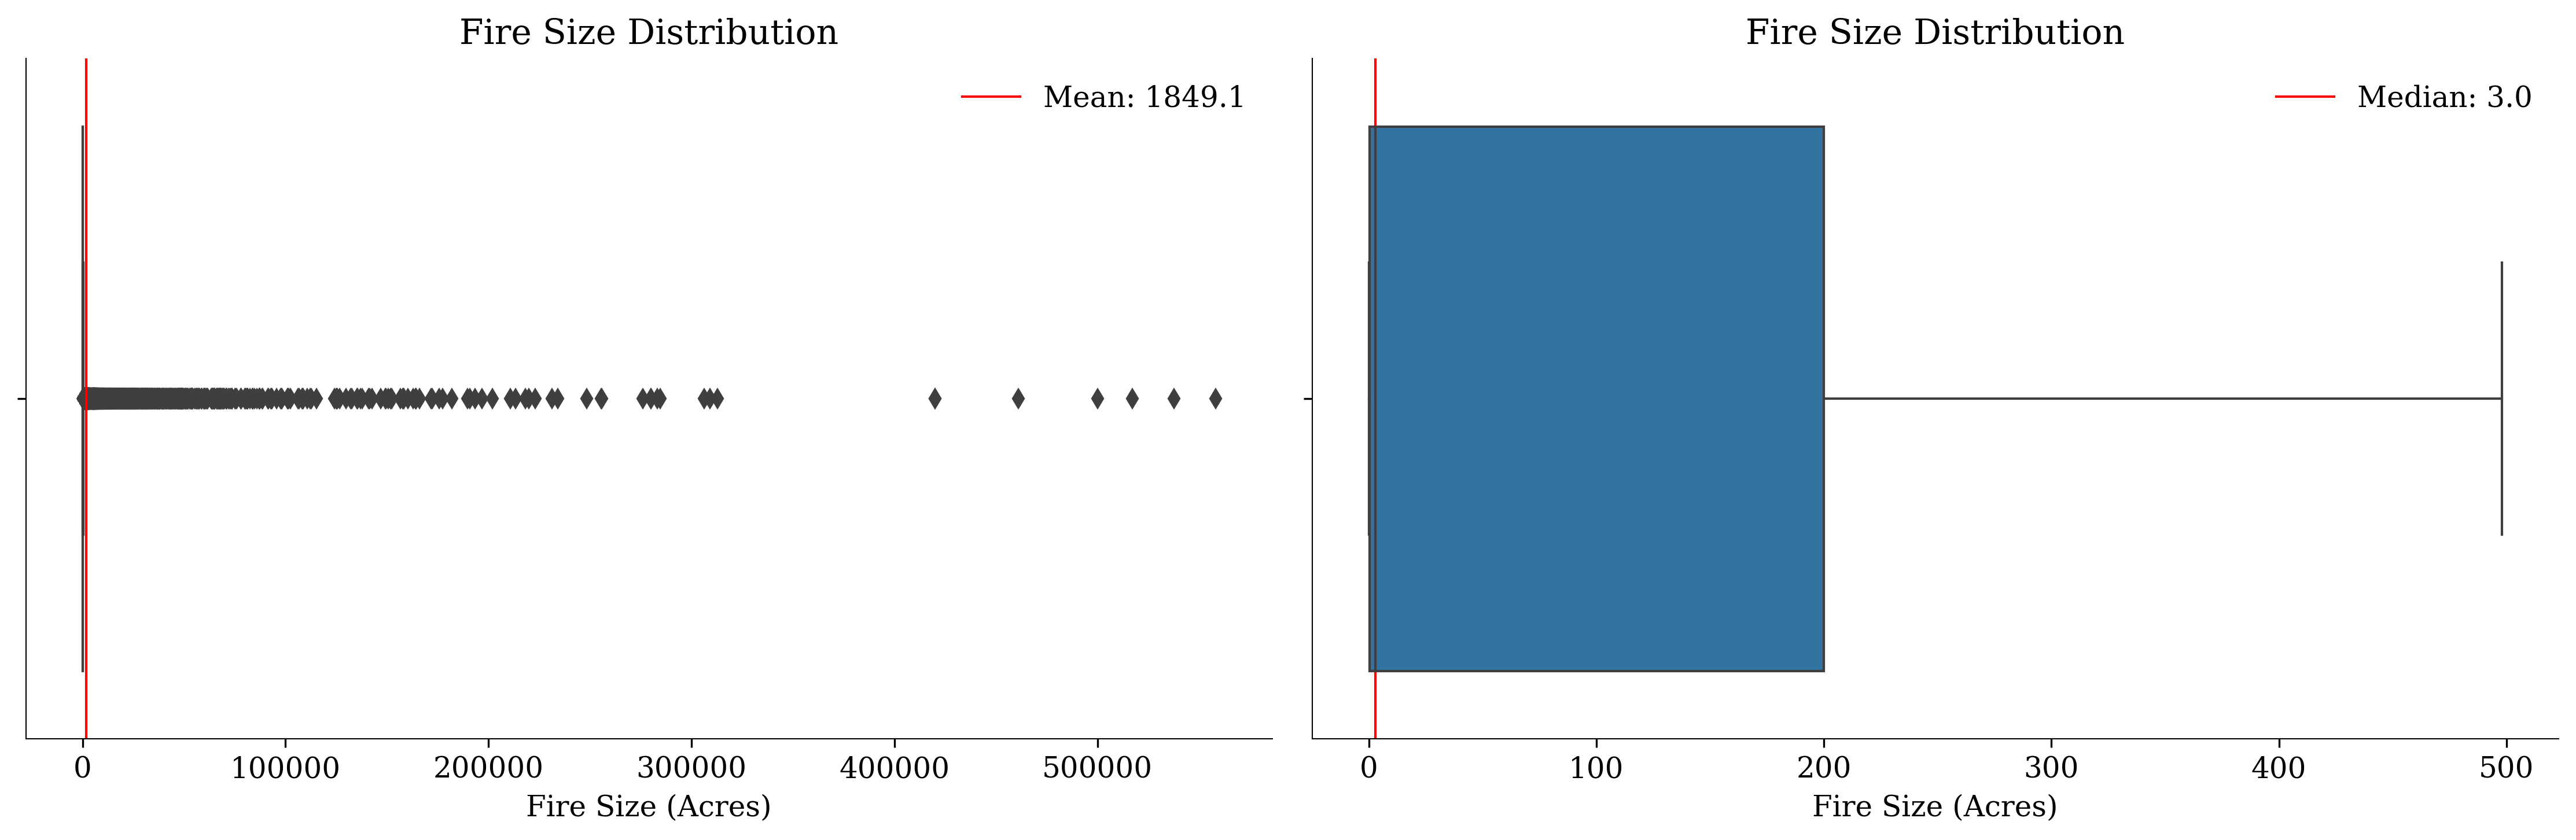

In [4]:
utils.PlotFireSizeDistribution(df)

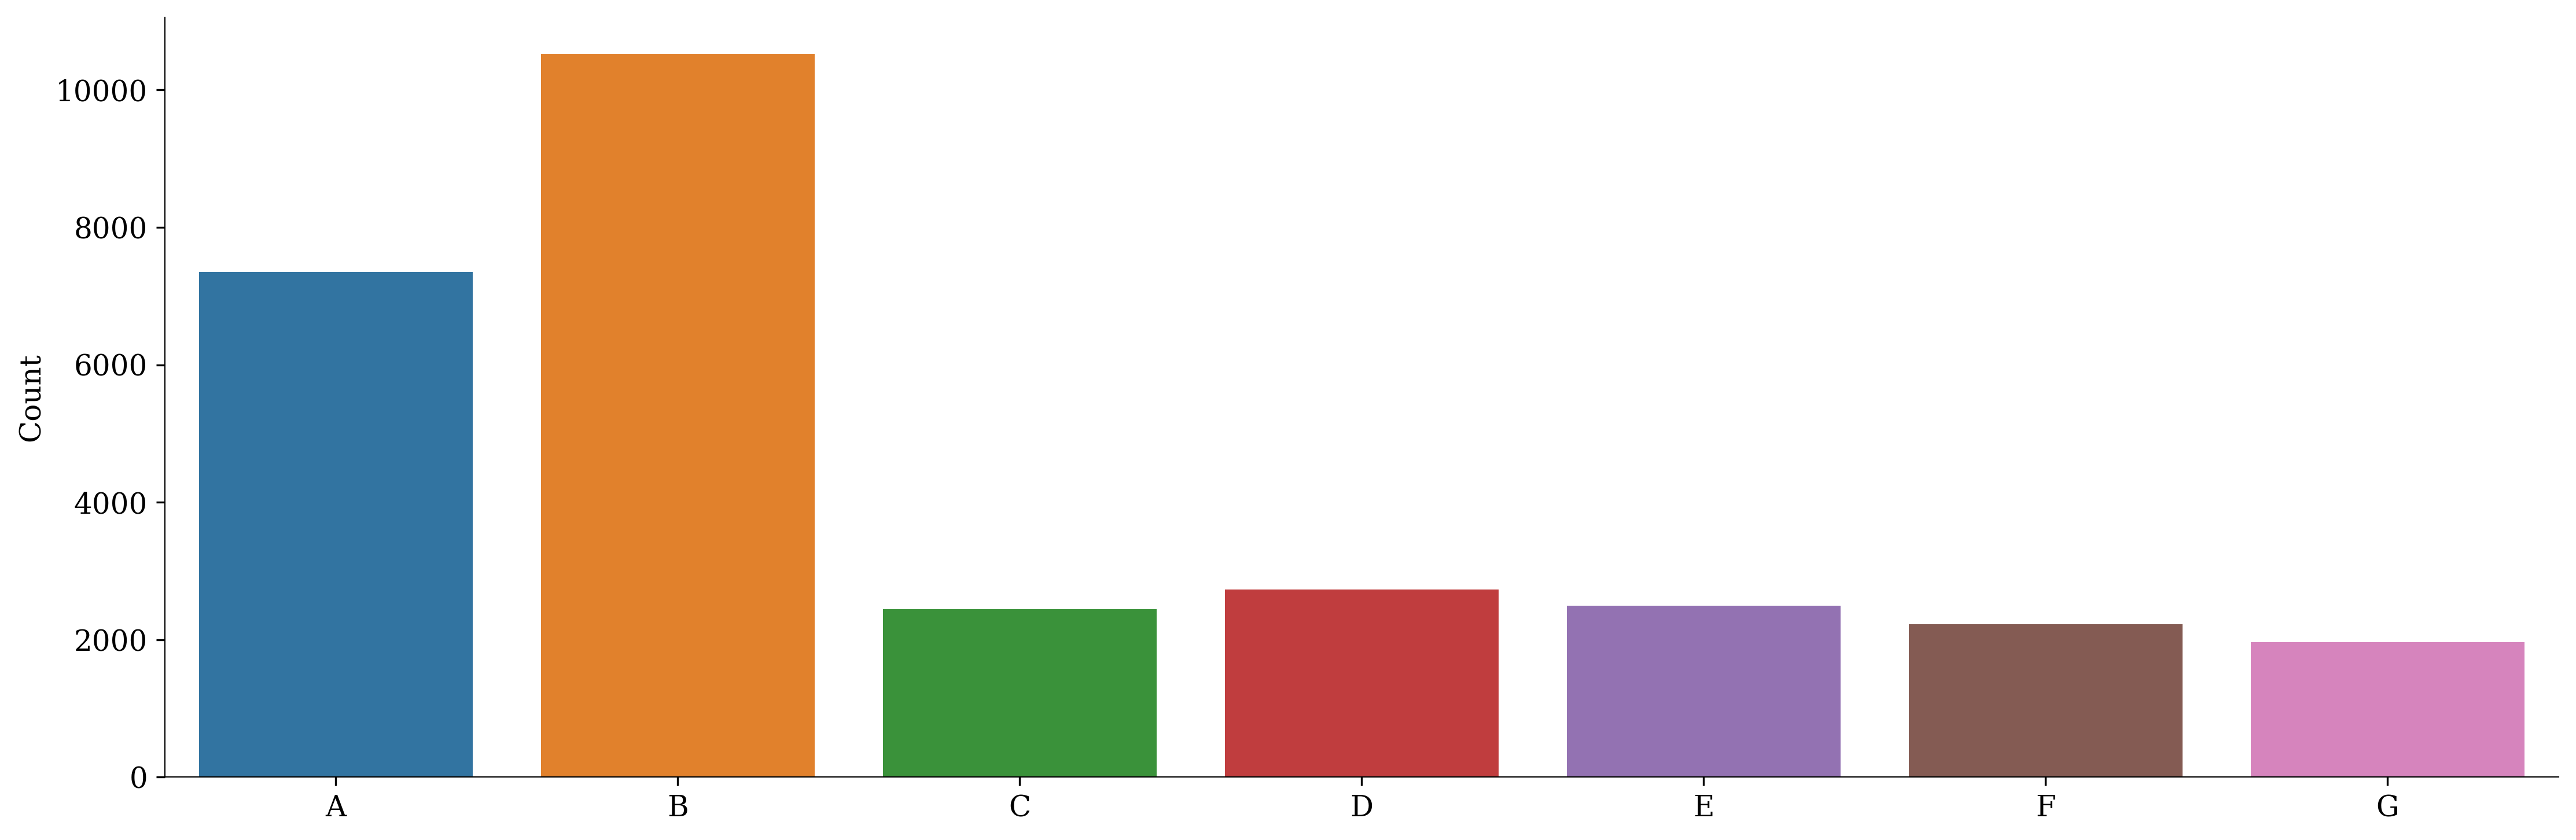

In [9]:
fire_size_df = utils.count_percentage_df(df['FIRE_SIZE_CLASS']).sort_index()

plt.figure(figsize=(15, 5))
sns.barplot(y='Count', x=fire_size_df.index, data=fire_size_df)
plt.show()

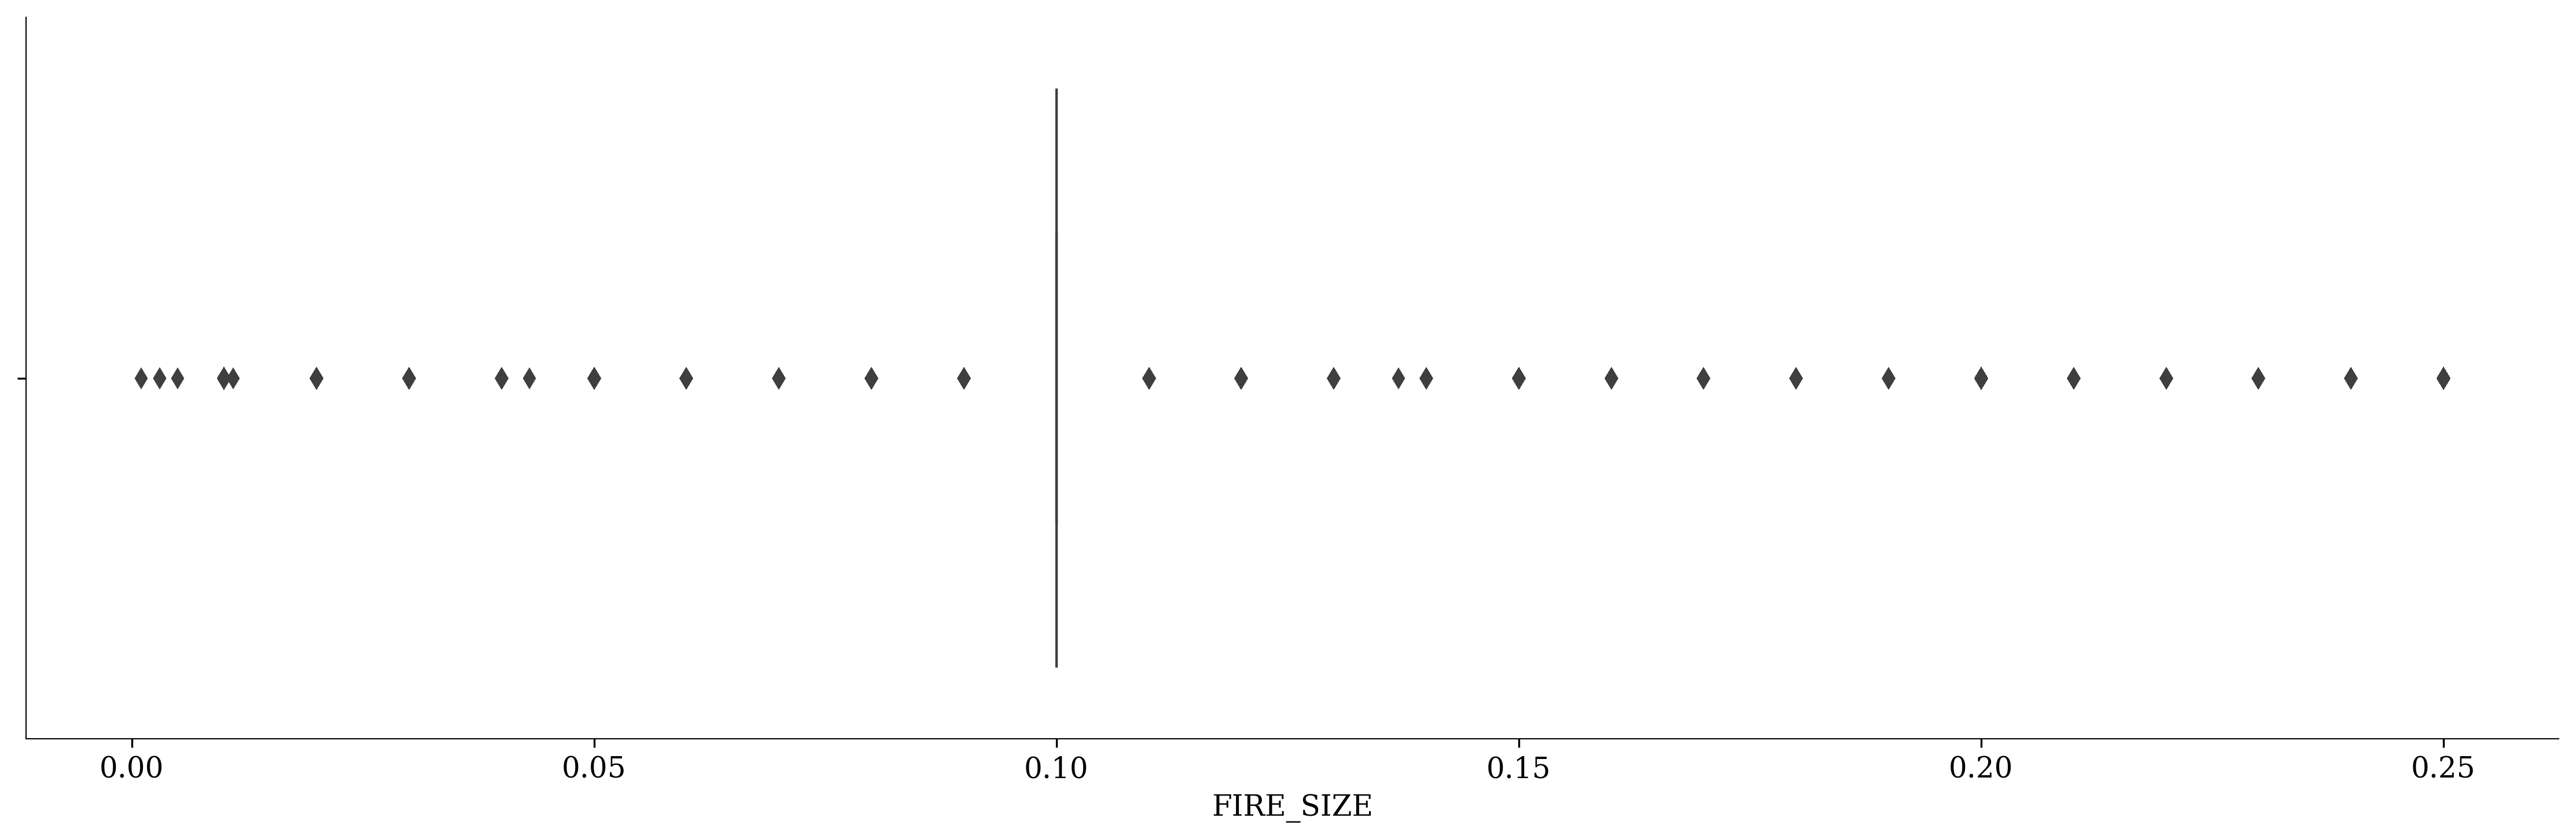

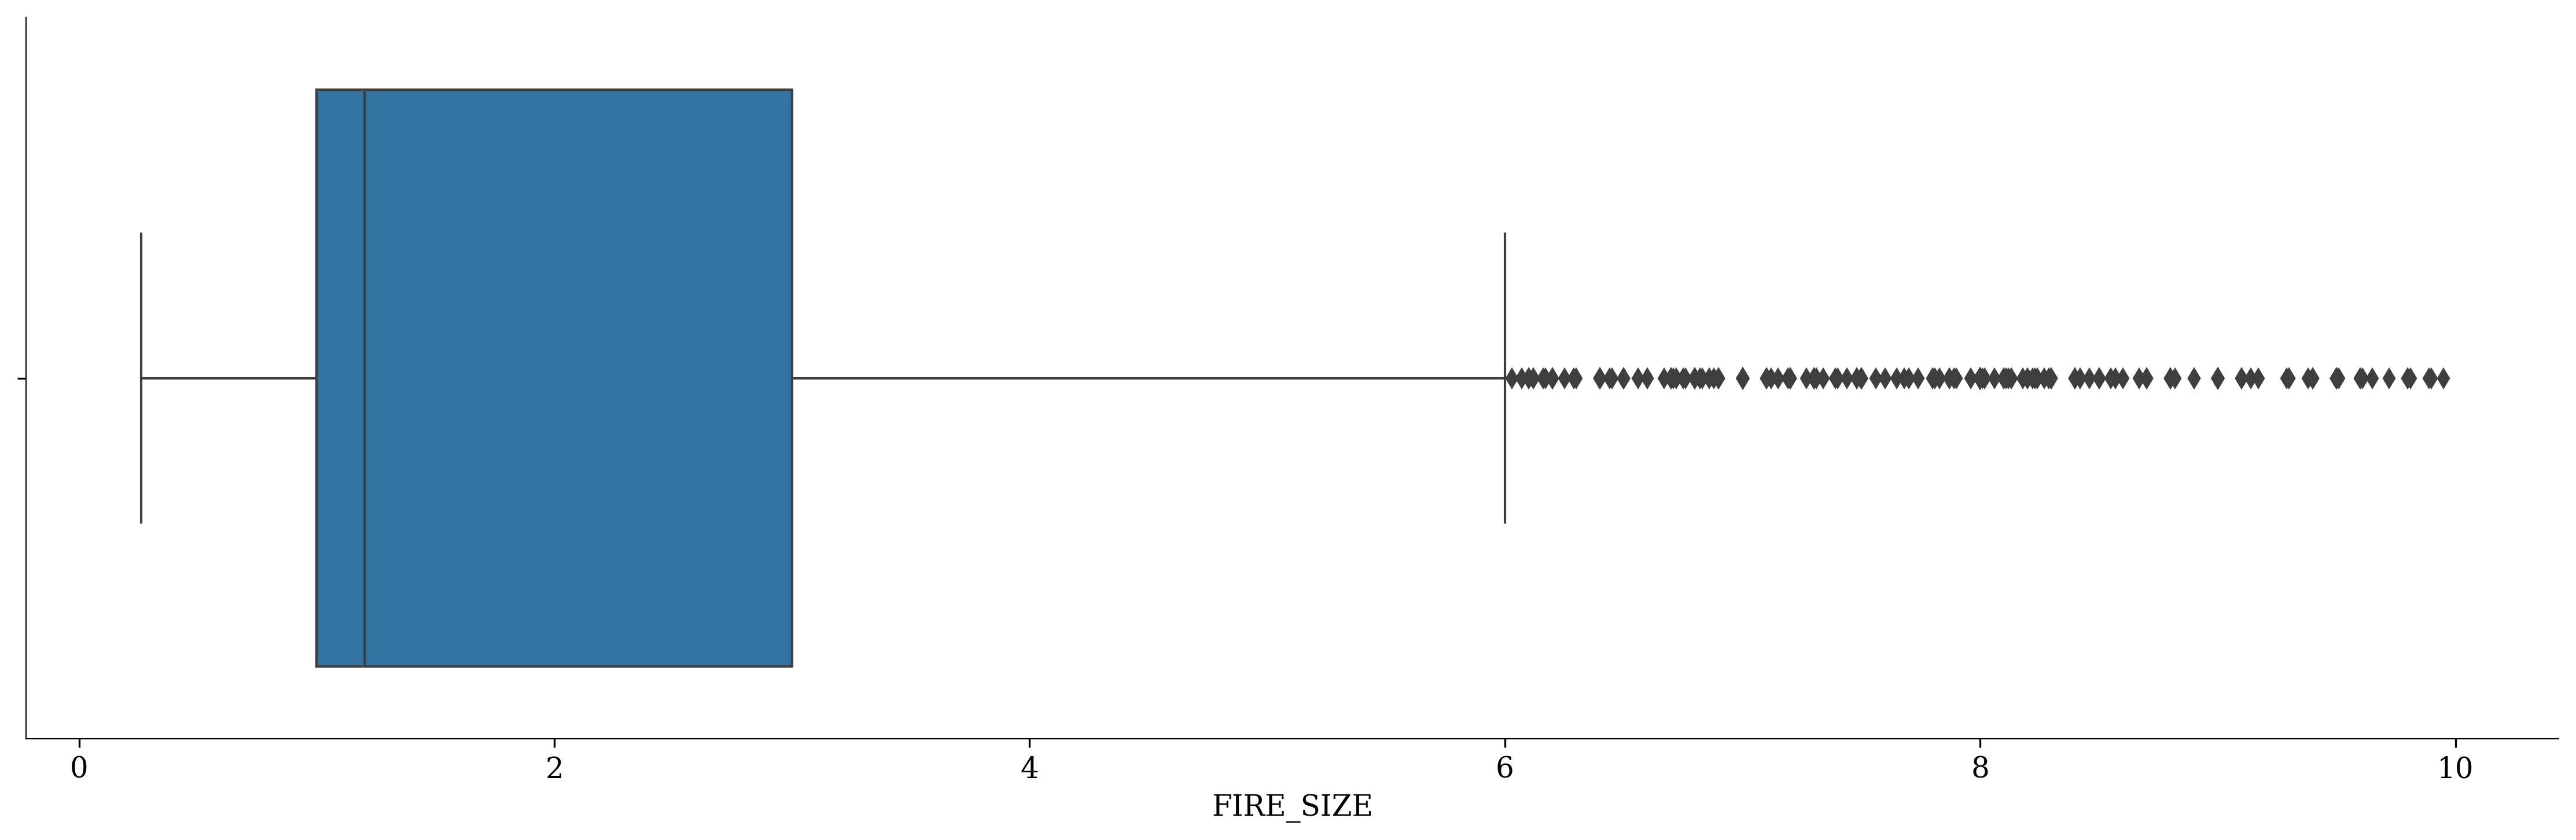

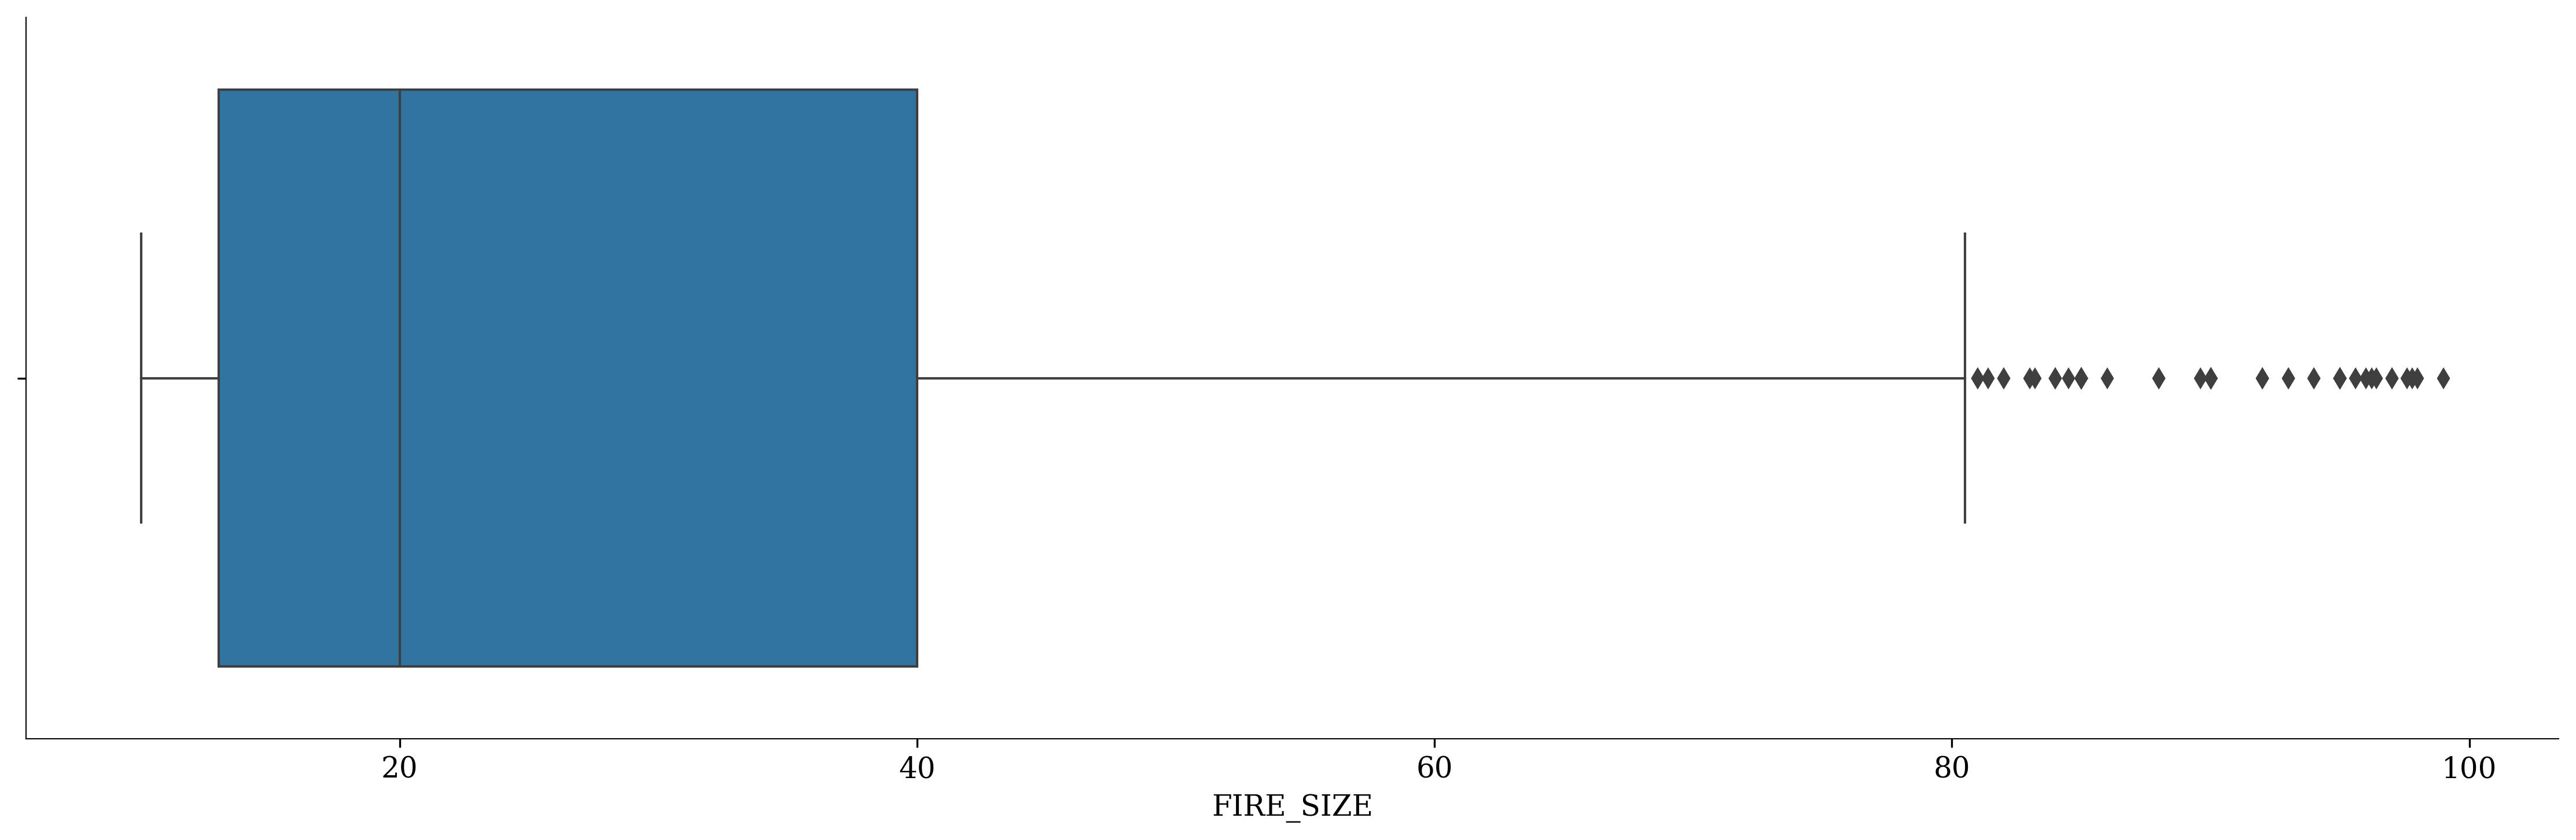

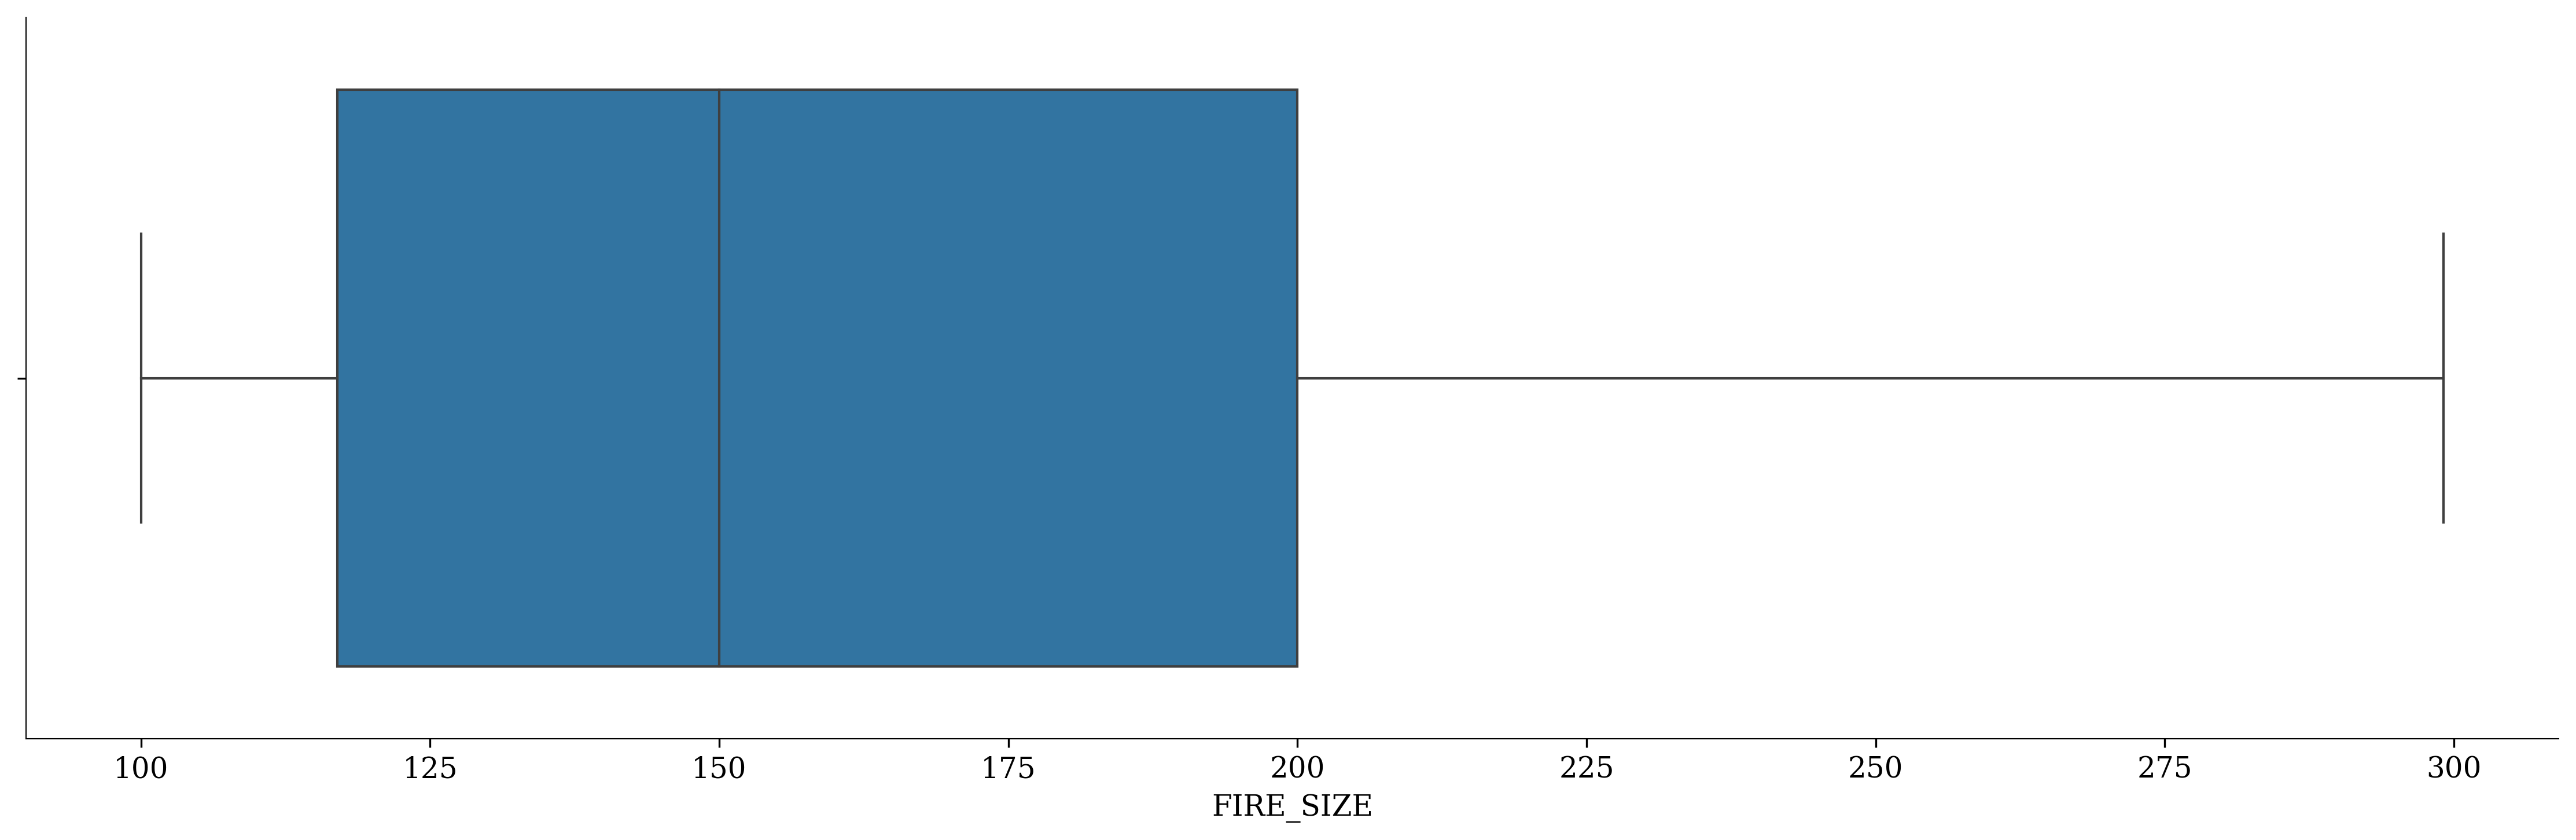

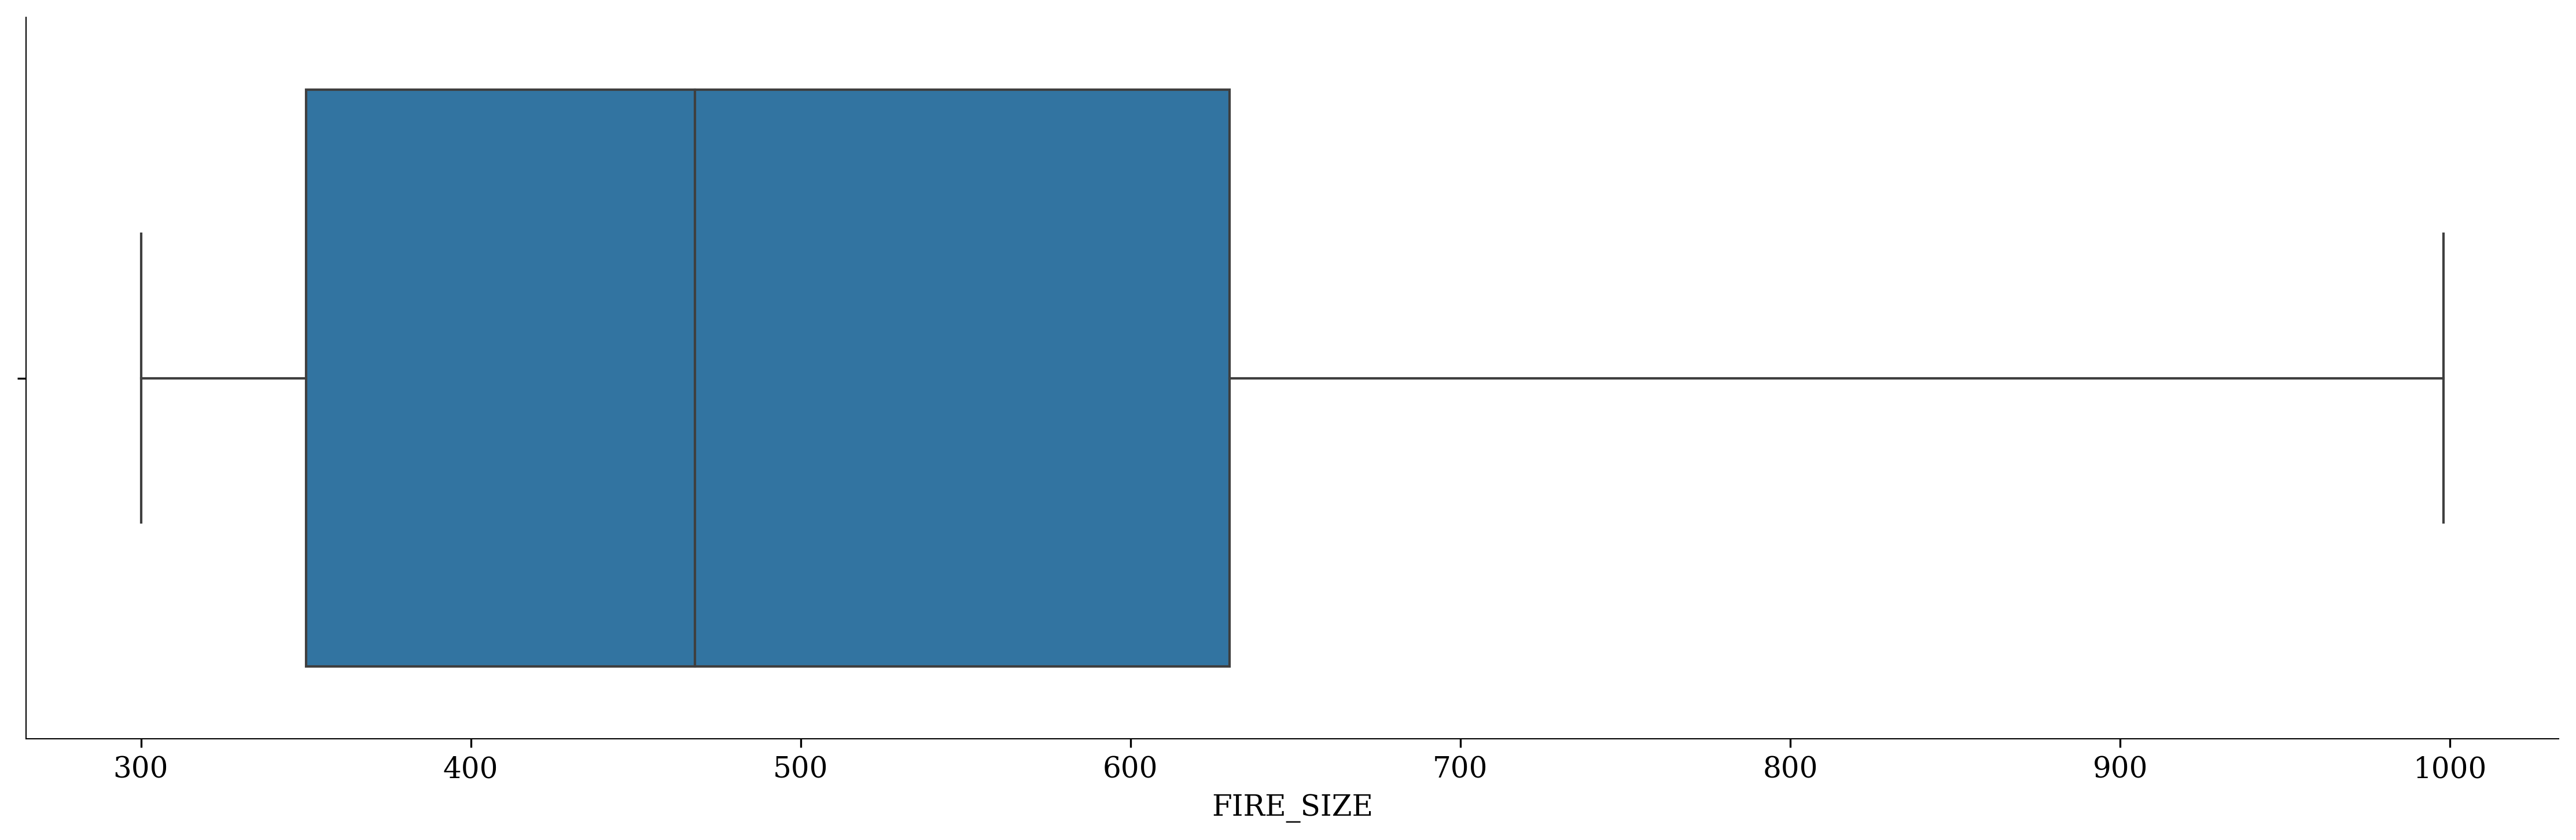

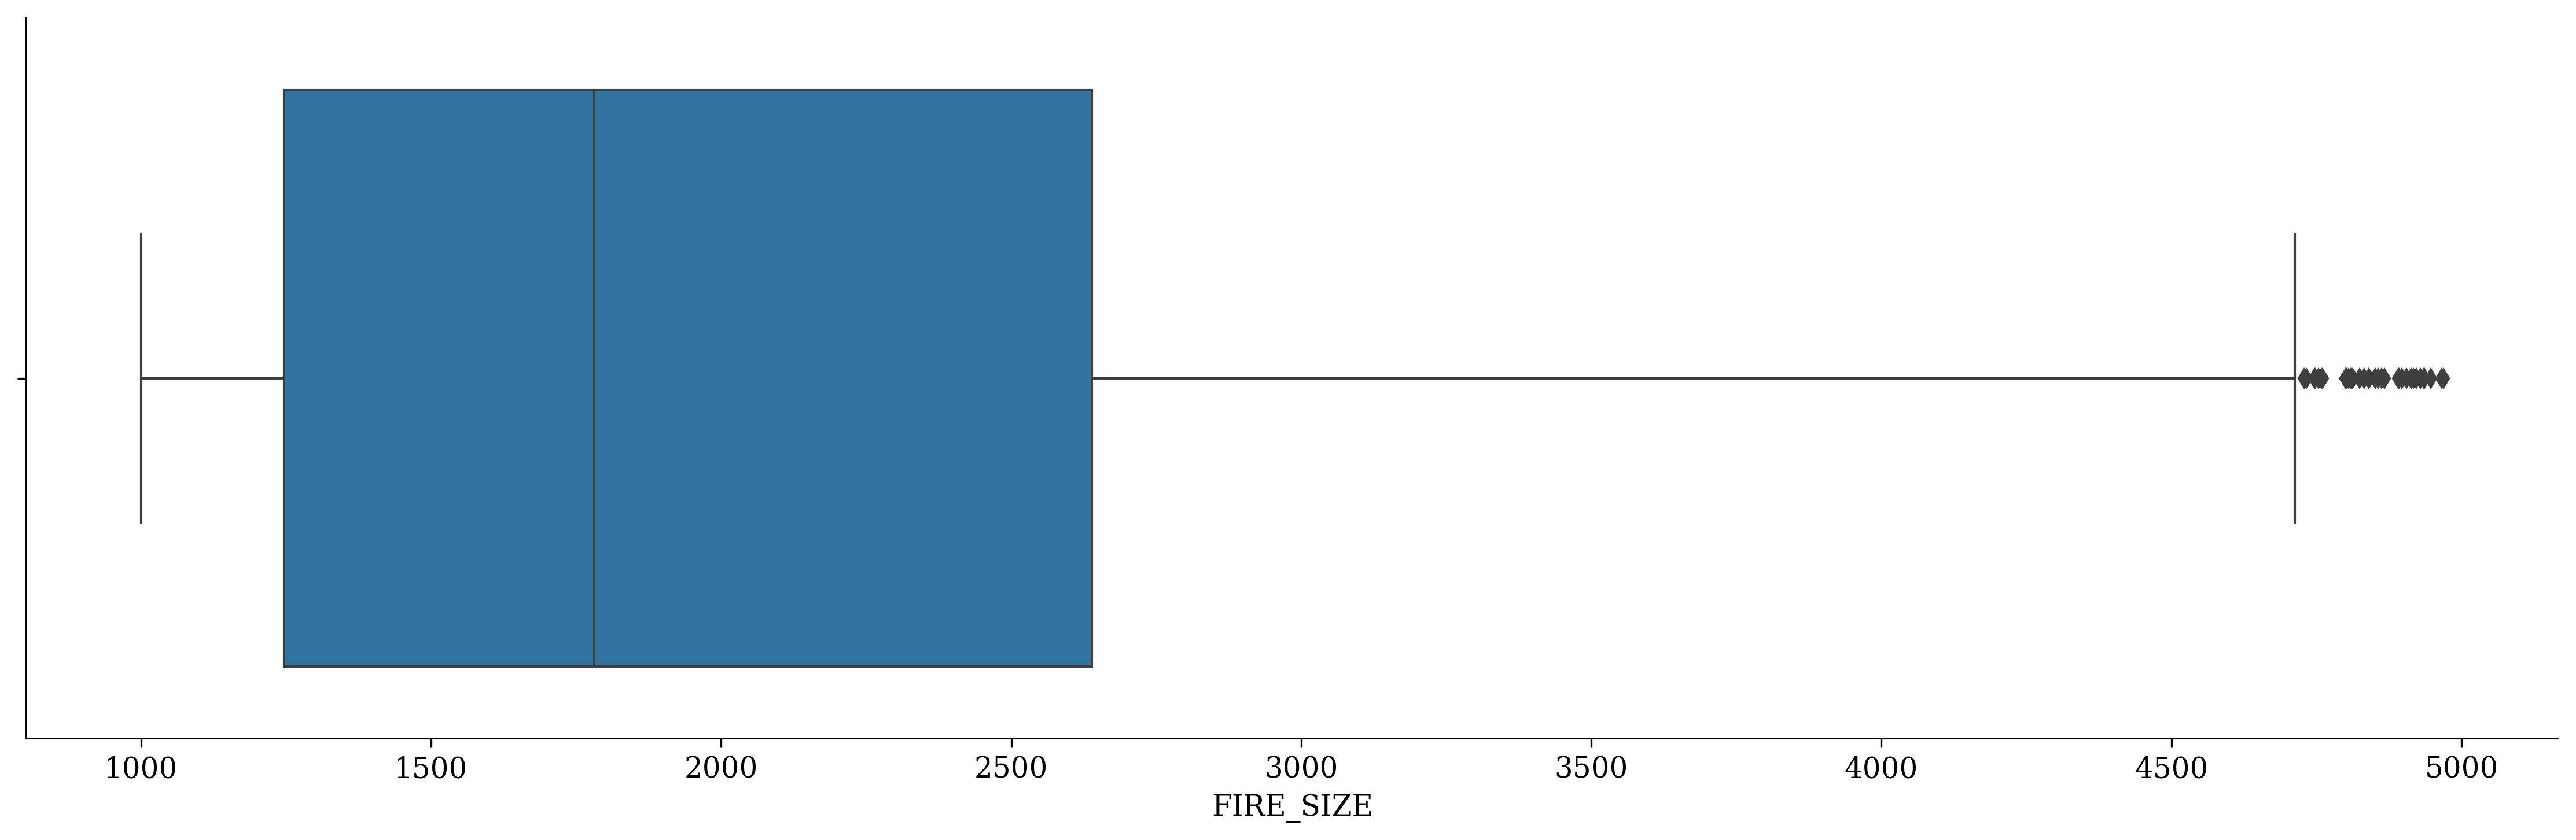

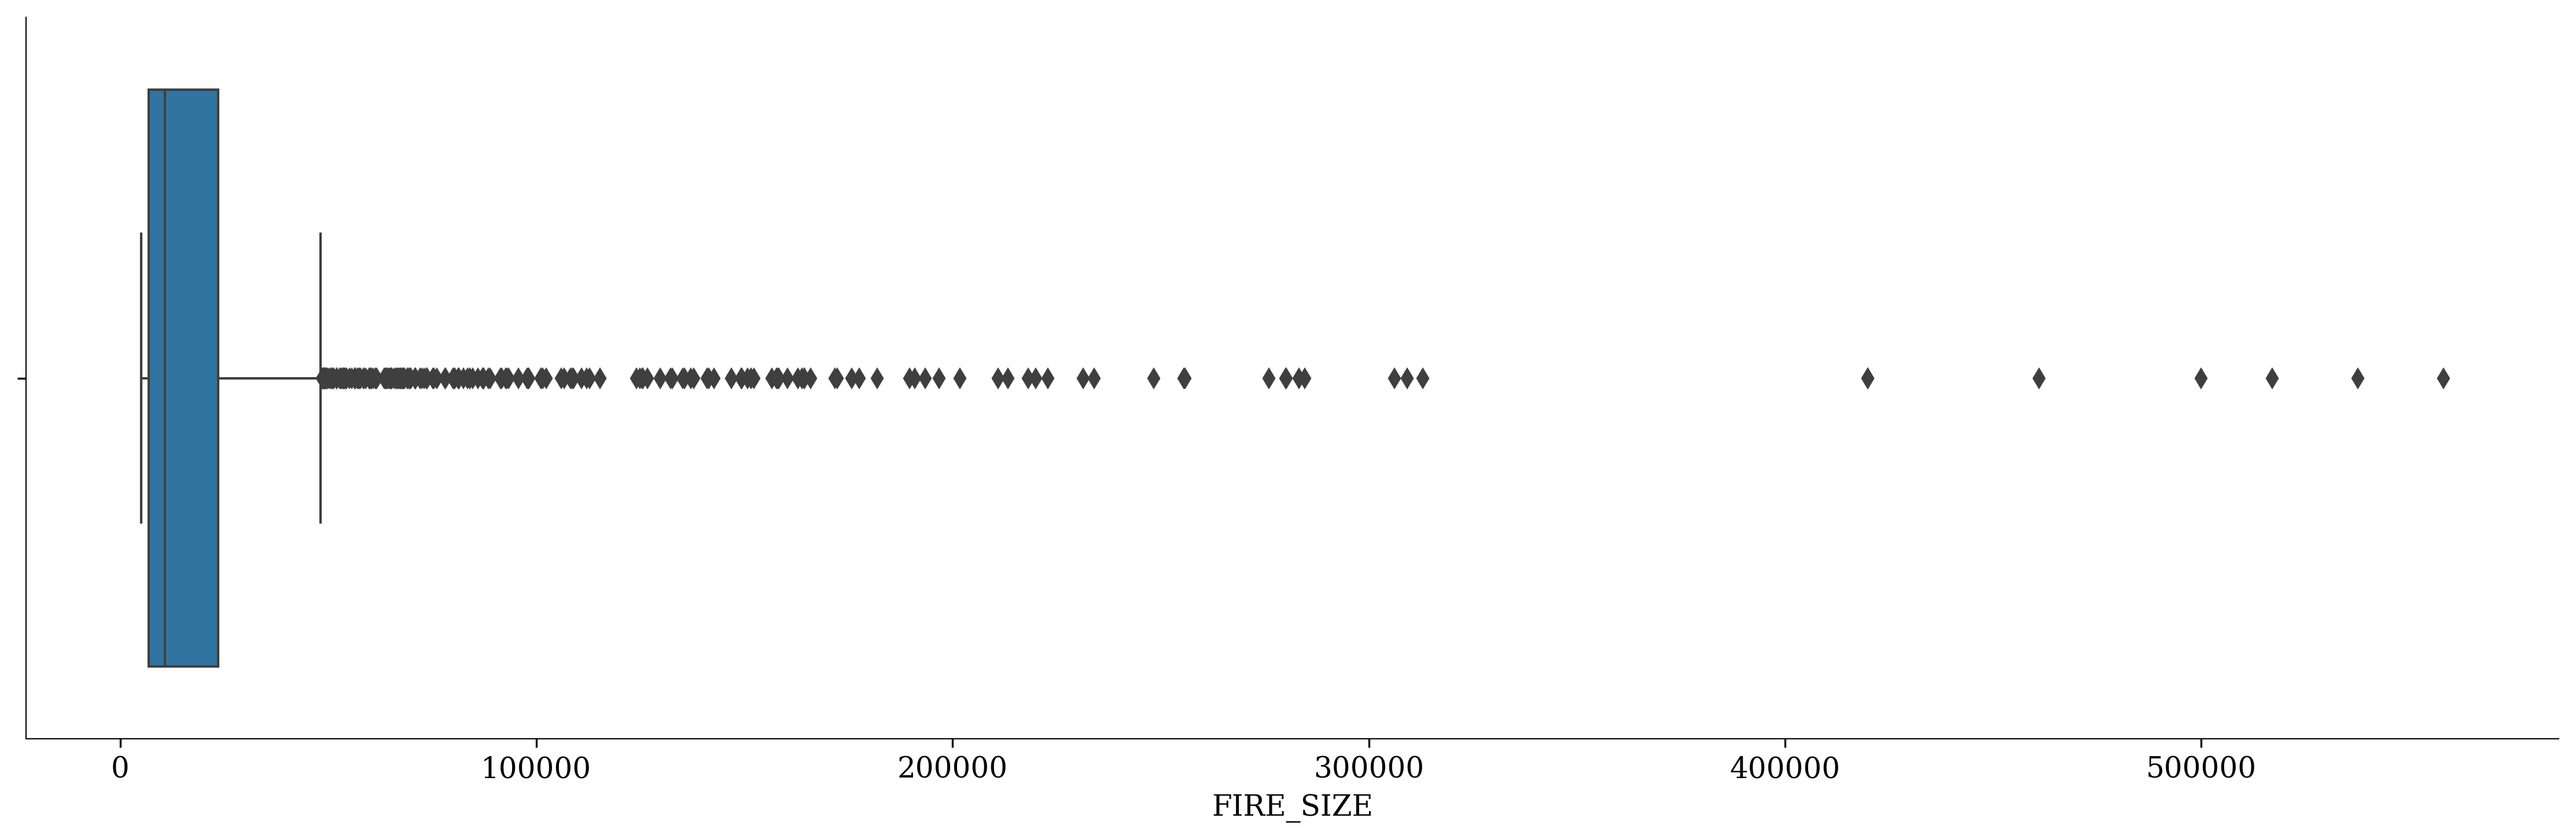

In [28]:
for fire_class in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    tmp = df[df['FIRE_SIZE_CLASS'] == fire_class]
    plt.figure(figsize=(15, 5))
    sns.boxplot(x=tmp['FIRE_SIZE'])
    plt.show()

In [10]:
q3, q1 = np.percentile(df['FIRE_SIZE'], [75 ,25])

In [14]:
q3, q1

(200.0, 0.3)

In [26]:
df[df['FIRE_SIZE_CLASS'] == 'E']

,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,avg_tempmax,avg_temp,avg_humidity,...,precip_variance,precip_delta,dew_variance,dew_delta,windspeed_variance,windspeed_delta,winddir_variance,winddir_delta,pressure_variance,pressure_delta
57,1992,34,449.2,E,36.700100,-94.625500,OK,16.128571,8.428571,63.171429,...,0.000000,0.00,1.344898,1.8,12.251020,0.0,5666.242041,252.8,8.337143,-7.0
265,1992,94,340.0,E,45.847959,-94.020634,MN,7.128571,1.757143,56.342857,...,7.449796,-7.80,23.869796,-6.5,38.185714,5.4,13385.119184,195.0,34.556735,-16.2
433,1992,145,340.0,E,28.170000,-81.150000,FL,28.928571,24.357143,69.771429,...,5.735927,-0.16,1.644082,-3.7,6.513878,-7.2,9490.754286,263.2,5.622041,-6.6
503,1992,173,800.0,E,39.676111,-121.588056,CA,33.228571,25.200000,47.114286,...,0.564192,-2.17,1.329796,2.0,28.174286,3.2,3787.540000,42.8,11.836735,-8.4
697,1992,234,800.0,E,39.861944,-121.928056,CA,39.028571,30.114286,31.157143,...,0.000000,0.00,6.631429,-7.1,38.102449,16.3,5511.662041,-101.7,3.010612,-5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25629,2010,293,400.0,E,37.177700,-83.947000,KY,20.628571,12.942857,62.757143,...,0.253910,-1.44,4.109796,-4.1,33.430612,-9.5,1839.030612,2.4,9.254286,-3.2
25630,1994,165,600.0,E,63.450000,-141.466659,AK,23.200000,18.542857,44.942857,...,5.479592,0.00,7.962041,4.6,8.728163,1.8,9442.519592,55.1,26.211429,-8.0
25631,2013,117,362.0,E,32.217222,-86.816103,AL,24.814286,17.771429,62.785714,...,0.159135,0.00,14.771020,8.7,3.477143,2.0,8558.251429,84.5,4.573469,-1.9
25632,1992,226,320.0,E,44.899800,-121.117800,OR,31.542857,21.057143,41.042857,...,0.000000,0.00,5.791429,1.4,49.684898,-11.4,1500.376735,-18.8,8.982449,0.3


In [29]:
transformed_fire_size = np.log10(df['FIRE_SIZE'])

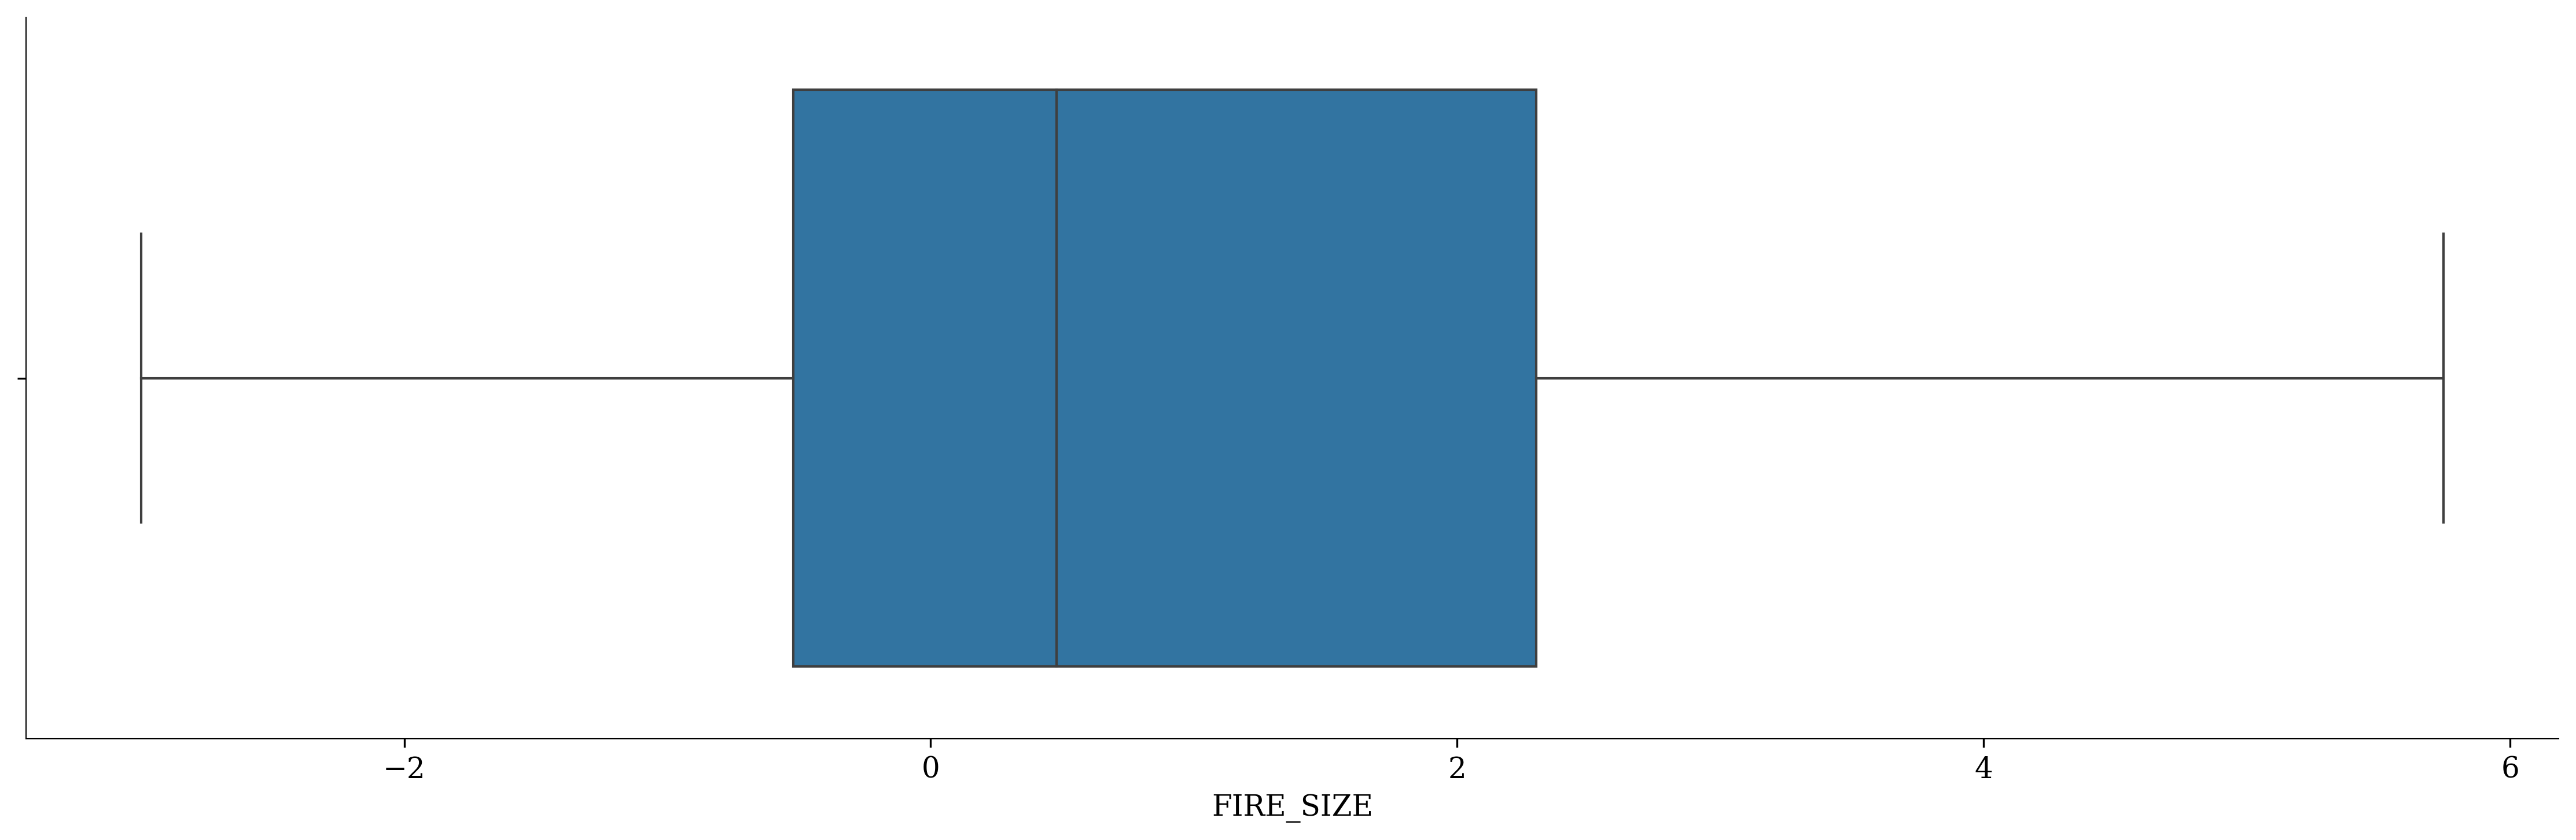

In [30]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=transformed_fire_size)
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_copy = df.copy()

df_copy = utils.BasicCategoricalPreprocessing(df_copy)
df_copy, _ = utils.BasicNumericPreprocessing(df_copy)

df_copy['FIRE_SIZE'] = np.log10(df_copy['FIRE_SIZE'])

X = df_copy.drop(['FIRE_SIZE', 'FIRE_SIZE_CLASS'], axis=1)
y = df_copy['FIRE_SIZE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

column_transformer = model_utils.CreateColumnTransformer(X)

X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

linreg = LinearRegression()
linreg.fit(X_train_transformed, y_train)
linreg.score(X_test_transformed, y_test)

0.2363081788685537